# Algotrading - Aula 4

Montando um Backtesting simples
___

Vamos começar importando algumas bibliotecas úteis

In [1]:
# Pequeno ajuste inicial

!pip install "numpy<1.25" --upgrade

  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
ERROR: Exception:
Traceback (most recent call last):
  File "/home/joao/Documents/AlgoTrading/.venv/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 107, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/home/joao/Documents/AlgoTrading/.venv/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 98, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/joao/Documents/AlgoTrading/.venv/lib/python3.12/site-packages/pip/_internal/cli/req_command.py", line 71, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/joao/Documents/AlgoTrading/.venv/lib/python3.12/site-packages/pip/_internal/commands/install.py", line 393, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  Fil

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display

Instalar também uma biblioteca também útil para pegar dados de fechamento direito do yahoo finance:

In [3]:
!pip install yfinance

Agora vamos baixar dados de fechamento (**Historical Data**) de 5 anos diretamente do site

In [4]:
import yfinance as yf
from datetime import datetime, timedelta

ticker = '^BVSP'

# Selecionado uma data de hoje menos 5 anos
start_date = (datetime.now() - timedelta(days=5*365))

# Formatando para Ymd
start_date = start_date.strftime('%Y-%m-%d')

# Selecionando a data de ontem
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date, interval='1d', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


Agora que sabemos como separar o que interessa, vamos começar a montar nosso dataframe

In [5]:
# Remove o ticker do index
ibov = data.droplevel(1, axis=1)
ibov

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-16,99676.0,100663.0,99663.0,100299.0,7139400
2020-09-17,100098.0,100251.0,98562.0,99674.0,0
2020-09-18,98290.0,100102.0,98045.0,100098.0,11370300
2020-09-21,96991.0,98283.0,95820.0,98283.0,9738000
2020-09-22,97294.0,97684.0,96390.0,96995.0,7281300
...,...,...,...,...,...
2025-09-08,141792.0,143089.0,141329.0,142640.0,7440900
2025-09-09,141618.0,142286.0,141606.0,141794.0,7481900
2025-09-10,142349.0,143182.0,141612.0,141612.0,7138700


Voltando aos dados diários, vamos dar uma olhadinha brevemente nos retornos

In [6]:
ibov_ret = ibov["Close"].pct_change().dropna()*100
ibov_ret.head(10)

Date
2020-09-17    0.423372
2020-09-18   -1.806230
2020-09-21   -1.321599
2020-09-22    0.312400
2020-09-23   -1.602360
2020-09-24    1.333890
2020-09-25   -0.013400
2020-09-28   -2.405179
2020-09-29   -1.147191
2020-09-30    1.093182
Name: Close, dtype: float64

Explorando os dados

In [7]:
# Medidas Resumo
ibov_ret.describe()

count    1242.000000
mean        0.035254
std         1.148954
min        -5.120086
25%        -0.631816
50%         0.032359
75%         0.748937
max         5.540864
Name: Close, dtype: float64

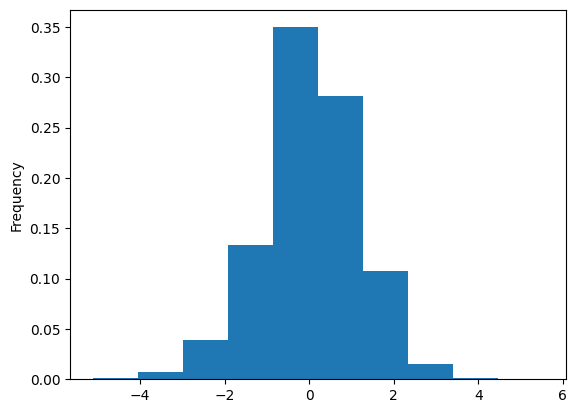

In [8]:
# Histograma
ibov_ret.plot.hist(density=True);

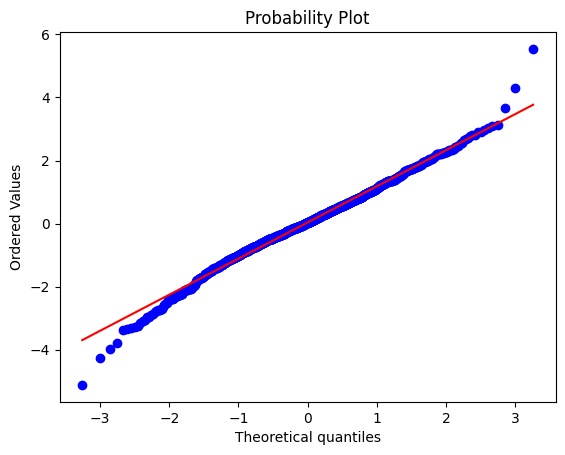

In [9]:
# Histograma
import scipy.stats as stats
stats.probplot(ibov_ret, dist="norm", plot=plt);

Obs: Deveríamos fazer o teste de normalidade dos dados para ter certeza!

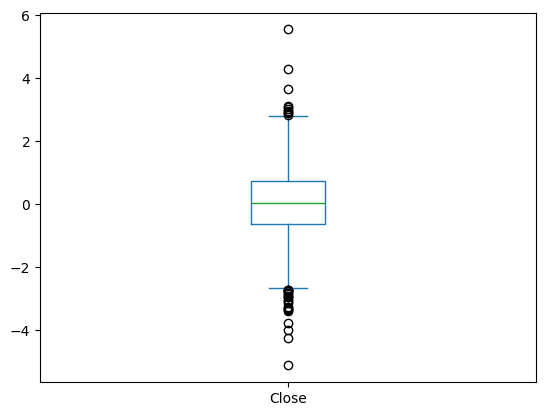

In [10]:
# Boxplot
ibov_ret.plot(kind='box');

Calculando o log-retorno

In [11]:
ibov_logr = ibov.Close.apply(np.log).diff().dropna()*100
ibov_logr.head()

Date
2020-09-17    0.422478
2020-09-18   -1.822741
2020-09-21   -1.330410
2020-09-22    0.311913
2020-09-23   -1.615336
Name: Close, dtype: float64

Apenas verificando se log-retorno e retorno são muito diferentes para esses dados

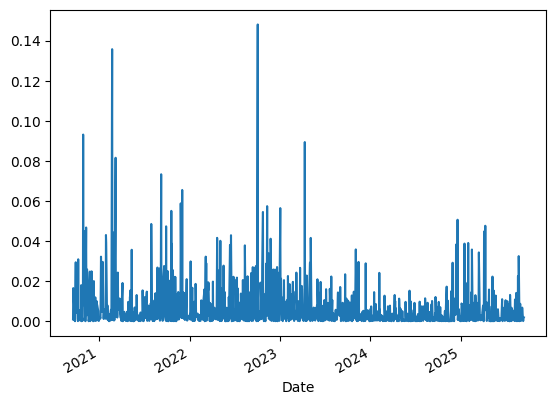

In [12]:
(ibov_ret - ibov_logr).plot();

### Simulando uma Estratégia de Trading

Vamos começar olhando como interagir com os dados:

In [13]:
# Percorrendo todos os preços de fechamento
for price in ibov.Close:
    print(price)

99676.0
100098.0
98290.0
96991.0
97294.0
95735.0
97012.0
96999.0
94666.0
93580.0
94603.0
95479.0
94016.0
96089.0
95615.0
95526.0
97920.0
97483.0
98503.0
99334.0
99054.0
98309.0
98658.0
100540.0
100552.0
101918.0
101260.0
101017.0
99606.0
95369.0
96582.0
93952.0
95587.0
97811.0
100774.0
100799.0
103913.0
105351.0
104532.0
102175.0
104512.0
106430.0
107229.0
106483.0
106517.0
107379.0
109786.0
110133.0
110227.0
110575.0
108888.0
111335.0
111814.0
112919.0
113682.0
113625.0
113571.0
112722.0
114992.0
115323.0
114975.0
116146.0
117947.0
118157.0
117679.0
116016.0
116348.0
117857.0
119051.0
119475.0
119306.0
118558.0
119223.0
119851.0
121956.0
125077.0
122807.0
123998.0
122040.0
123481.0
120502.0
121242.0
120673.0
119708.0
118443.0
117172.0
116464.0
115882.0
119314.0
116007.0
117365.0
118234.0
119725.0
119261.0
119925.0
119516.0
119429.0
118430.0
119235.0
119116.0
120391.0
119140.0
118748.0
112668.0
115227.0
115668.0
112256.0
110035.0
110335.0
111540.0
111184.0
112690.0
115202.0
110612.0
11

Imagine agora que você comprou 1 contrato do instrumento sem alavancagem no próprio preço no primeiro ponto:

In [14]:
# Primeiro ponto:
print(ibov.Close.iloc[0])

99676.0


Obs: Não é possível comprar IBOV diretamente como uma ação. O índice bovespa é formado por uma cesta de ações ponderadas pelo seu volume histórico. Mas é possível comprar ETF (Exchange Traded Fund) ou Futuro (derivativo) que segue o índice. https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

In [15]:
# Montando a alocação

k = 1_000_000
q = k // ibov.Close.iloc[0]
k -= q * ibov.Close.iloc[0]

notional = q * ibov.Close.iloc[0]
print(f"Quantidade de instrumentos comprados: {q}")
print(f"Preço de compra: {ibov.Close.iloc[0]}")
print(f"Tamanho da posição: {notional}")
print(f"Caixa restante: {k}")

Quantidade de instrumentos comprados: 10.0
Preço de compra: 99676.0
Tamanho da posição: 996760.0
Caixa restante: 3240.0


*Notional* é uma denominação para a posição em termos de dinheiro, usado principalmente para posições alavancadas de derivativos. Ela se contrapõe à palavra *position*, que pode denominar tanto a quantidade de dinheiro ou a quantidade de ações/contratos.

---

Agora imagine que vendeu no último dia:

In [16]:
# Resultado em termos monetários
result = q * ibov.Close.iloc[-1] - notional
print(result)

425960.0


Esse é o retorno financeiro (em dinheiro) que você obteve **comprando** no primeiro dia e **vendendo** no último dia da simulação. Essa estratégia é chamada de **BUY & HOLD** ou **BnH**.

E qual foi o retorno percentual?

In [17]:
# Em percentual (retorno):
print(f'{result/notional*100:0.2f}%')

42.73%


Resultado: Se comprou IBOV 5 anos atrás e vendeu ontem, ganhou cerca de R$ 356 mil investindo cerca de R$ 917 mil.

PnL (Profit & Loss): 36.93\%

Parece um bom negócio? Será que é tão simples?

___

Para contar **toda** a história do **trade**, queremos saber quanto ela rendeu ao longo do tempo usando marcação a mercado (Mark to Market - MtM).

MtM é uma forma de saber o seu patrimônio atual, ou seja, o seu dinheiro em caixa somado ao valor atual dos seus ativos. É uma forma de gerenciar melhor os riscos, sem cair na falácia do "Não vendi, não perdi", uma forma de auto-enganação.

---

Precisamos analisar o quanto seria o meu resultado para cada dia que passa durante o trade:

In [18]:
# Comprei no primeiro ponto
k = 1_000_000
q = k // ibov.Close.iloc[0]
k -= q * ibov.Close.iloc[0]

notional = q * ibov.Close.iloc[0]

for price in ibov.Close:
    # Para cada ponto, calculo meu resultado se fosse vender
    print(f"Retorno acumualdo diário: {q * price - notional}")

Retorno acumualdo diário: 0.0
Retorno acumualdo diário: 4220.0
Retorno acumualdo diário: -13860.0
Retorno acumualdo diário: -26850.0
Retorno acumualdo diário: -23820.0
Retorno acumualdo diário: -39410.0
Retorno acumualdo diário: -26640.0
Retorno acumualdo diário: -26770.0
Retorno acumualdo diário: -50100.0
Retorno acumualdo diário: -60960.0
Retorno acumualdo diário: -50730.0
Retorno acumualdo diário: -41970.0
Retorno acumualdo diário: -56600.0
Retorno acumualdo diário: -35870.0
Retorno acumualdo diário: -40610.0
Retorno acumualdo diário: -41500.0
Retorno acumualdo diário: -17560.0
Retorno acumualdo diário: -21930.0
Retorno acumualdo diário: -11730.0
Retorno acumualdo diário: -3420.0
Retorno acumualdo diário: -6220.0
Retorno acumualdo diário: -13670.0
Retorno acumualdo diário: -10180.0
Retorno acumualdo diário: 8640.0
Retorno acumualdo diário: 8760.0
Retorno acumualdo diário: 22420.0
Retorno acumualdo diário: 15840.0
Retorno acumualdo diário: 13410.0
Retorno acumualdo diário: -700.0
Ret

Não foi muito útil, vamos gerar o gráfico:

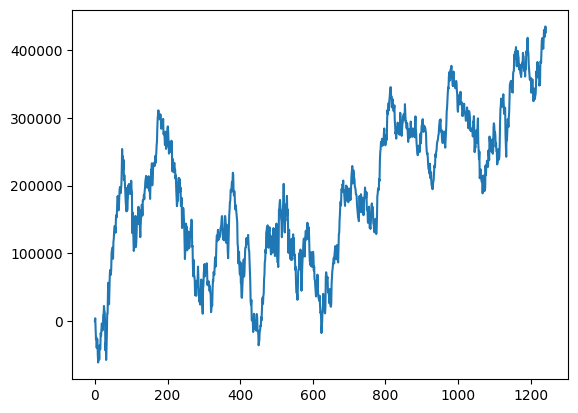

In [19]:
# Comprei no primeiro ponto
k = 1_000_000
q = k // ibov.Close.iloc[0]
k -= q * ibov.Close.iloc[0]

notional = q * ibov.Close.iloc[0]

result = []
for price in ibov.Close:
    # Para cada ponto, calculo meu resultado se fosse vender e guardo em uma lista
    result.append(q * price - notional)

pd.Series(result).plot();

Agora sim, e não pareceu tão bonito quanto o resultado final. Qual foi o pior momento?

In [20]:
min(result)

np.float64(-60960.0)

In [21]:
print(f'{min(result)/notional*100:0.2f}%')

-6.12%


Esse resultado é o **Max Drawdown** (**MDD**), ou seja, o maior prejuízo pontual ao longo do tempo. Você consegue calcular o Max Profit?

Outra medida a ser observada é a taxa de acerto (**Hitting Ratio** ou **HR**), mas como só foi feita 1 operação, essa medida não faz muito sentido ainda.

E a volatilidade do resultado?

In [22]:
pd.Series(result).describe()

count      1243.000000
mean     190007.843926
std      109553.721505
min      -60960.000000
25%      106580.000000
50%      190190.000000
75%      279175.000000
max      434750.000000
dtype: float64

In [23]:
(pd.Series(result[1:])*100/notional).describe()

count    1242.000000
mean       19.077895
std        10.982076
min        -6.115815
25%        10.696406
50%        19.095369
75%        28.008498
max        43.616317
dtype: float64

Para calcular a volatilidade anualizada, precisa anualizar o valor do desvio padrão (ver os slides da aula).
___
 
Também é possível fazer o chamado **backtesting vetorial**:

In [24]:
ibov_vet = ibov.copy()
ibov_vet['signal'] = [1] + [0]*(len(ibov_vet)-2) + [-1]

ibov_vet


Price,Close,High,Low,Open,Volume,signal
Date,,,,,,
2020-09-16,99676.0,100663.0,99663.0,100299.0,7139400,1
2020-09-17,100098.0,100251.0,98562.0,99674.0,0,0
2020-09-18,98290.0,100102.0,98045.0,100098.0,11370300,0
2020-09-21,96991.0,98283.0,95820.0,98283.0,9738000,0
2020-09-22,97294.0,97684.0,96390.0,96995.0,7281300,0
...,...,...,...,...,...,...
2025-09-08,141792.0,143089.0,141329.0,142640.0,7440900,0
2025-09-09,141618.0,142286.0,141606.0,141794.0,7481900,0
2025-09-10,142349.0,143182.0,141612.0,141612.0,7138700,0


In [25]:
ibov_vet['flow'] = - ibov_vet['signal'] * ibov_vet['Close']

ibov_vet

Price,Close,High,Low,Open,Volume,signal,flow
Date,,,,,,,
2020-09-16,99676.0,100663.0,99663.0,100299.0,7139400,1,-99676.0
2020-09-17,100098.0,100251.0,98562.0,99674.0,0,0,0.0
2020-09-18,98290.0,100102.0,98045.0,100098.0,11370300,0,0.0
2020-09-21,96991.0,98283.0,95820.0,98283.0,9738000,0,0.0
2020-09-22,97294.0,97684.0,96390.0,96995.0,7281300,0,0.0
...,...,...,...,...,...,...,...
2025-09-08,141792.0,143089.0,141329.0,142640.0,7440900,0,0.0
2025-09-09,141618.0,142286.0,141606.0,141794.0,7481900,0,0.0
2025-09-10,142349.0,143182.0,141612.0,141612.0,7138700,0,0.0


In [26]:
ibov_vet['flow'].sum()

np.float64(42596.0)

Esse é o resultado por instrumento. Para recuperar o número obtido anteriormente, multiplique pela quantidade comprada (nove) e verifique o batimento do resultado.

É possível reproduzir ainda algumas métricas, mas esse tipo de backtesting é muito limitado.

---

Para termos uma maior acurácia no backtesting, vamos fazer **evento a evento**, o que simularia realmente o cotidiano da vida real.

Alguns detalhes:

Sempre trabalhar com fluxo de caixa:
 * Toda vez que compra, dinheiro sai do bolso
 * Toda vez que vende, dinheiro entra

Sempre usar o MtM para estimar o resultado a cada evento (no caso dia)

---

Em python também é possível montar um gráfico mais interativo:

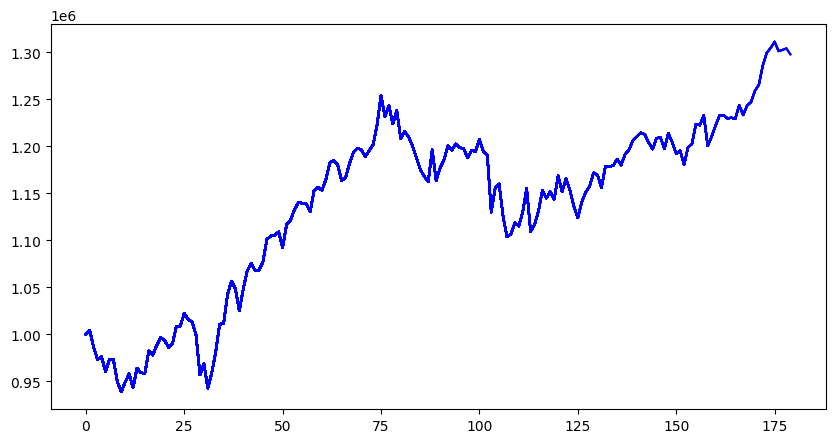

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));

cash = 1_000_000 # indica quanto dinheiro tem no bolso
position = 0 # indica a posição atual. 0 é zerado
result = [] # lista para montar o gráfico

# Vamos simular apenas os 100 primeiros pontos (dias)
for price in ibov.Close.iloc[:180]:
    
    # Se a posição está zerada, compra
    if position == 0:
        q = cash // price # Quantidade que pode comprar
        cash -= q * price # Fluxo de caixa negativo
        position = 1 # Indica que está comprado em 1

    # Qual o meu resultado atual
    result.append(cash + q * price * position) # Mark To Market!
   
    # Fazendo o plot a cada iteração:
    ax.plot(result, color='blue')    
    display.clear_output(wait=True)
    display.display(fig)
    
ax.plot(result, color='blue');
display.clear_output(wait=True)

---

#### NOVA ESTRATÉGIA

Vamos simular um clássico: 2-period RSI, apresentado por Larry Connors no livro Short-Term Trading Strategies That Work (2008).

A ideia é utilizar um indicador técnico chamado Relative Strenght Index (RSI) com o período curtíssimo de valor 2 (normalmente usa-se 14 observações).

RSI é um índice normalizado entre 0 e 100, utilizando uma razão entre média de subidas e quedas, suavizadas por uma média móvel exponencial. Mais detalhes mais tarde no curso.

* Entrada: no livro, Connors sugere a compra quando o valor do RSI(2) for menor ou igual a 10
* Saída: quando o RSI(2) atingir o valor maior ou igual a 80

Vamos montar um backtesting dessa estratégia!

Primeiro, vamos instalar uma biblioteca de auxílio:

In [28]:
!pip install pandas-ta

  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


Calculando o RSI(2):

In [29]:
%pip install "numpy<2.2" --upgrade
import pandas_ta as ta
ibov['rsi'] = ibov.ta.rsi(length=2)
ibov = ibov.dropna()
ibov

  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-ta 0.4.67b0 requires numpy>=2.2.6, but you have numpy 2.1.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Price,Close,High,Low,Open,Volume,rsi
Date,,,,,,
2020-09-17,100098.0,100251.0,98562.0,99674.0,0,100.000000
2020-09-18,98290.0,100102.0,98045.0,100098.0,11370300,18.923767
2020-09-21,96991.0,98283.0,95820.0,98283.0,9738000,8.740679
2020-09-22,97294.0,97684.0,96390.0,96995.0,7281300,27.052980
2020-09-23,95735.0,97389.0,95728.0,97294.0,8830700,8.826707
...,...,...,...,...,...,...
2025-09-08,141792.0,143089.0,141329.0,142640.0,7440900,53.980196
2025-09-09,141618.0,142286.0,141606.0,141794.0,7481900,46.305409
2025-09-10,142349.0,143182.0,141612.0,141612.0,7138700,75.533542


### Lista: Exercício 1 - 17/Set até 14h00

* Implementar as métricas dos slides da aula. Considerar apenas: Profitability, Risk e Performance Metrics
* Implementar o carrego (rendimento do dinheiro em caixa). Considerar CDI hipotético de 10% ao ano
* Desconsiderar os custos por enquanto. Assumir que entra no preço de fechamento do dia usado no RSI
* Entregar um **IPYNB (Jupyter Notebook em PYTHON)** com o código e o gráfico da simulação do resultado
* Prazo: **17/Set até 14h00** via Blackboard (Após esse prazo será considerado atrasado)
* Entrega obrigatória! Entregas incompletas ou que não cumprem os requisitos acima, não serão consideradas e precisarão ser reentregues com atraso.
* Estritamente individual

In [30]:
# Implementação manual do RSI para evitar problemas de dependências
def calculate_rsi(prices, window=2):
    """
    Calcula o RSI (Relative Strength Index)
    """
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculando o RSI(2) manualmente
ibov['rsi'] = calculate_rsi(ibov['Close'], window=2)
ibov = ibov.dropna()

print("RSI calculado com sucesso!")
ibov[['Close', 'rsi']].tail()

RSI calculado com sucesso!


Price,Close,rsi
Date,,
2025-09-08,141792.0,66.012024
2025-09-09,141618.0,0.000000
2025-09-10,142349.0,80.773481
2025-09-11,143151.0,100.000000
2025-09-12,142272.0,47.709697


In [31]:
ibov['rsi'].describe()

count    1241.000000
mean       51.458154
std        40.170525
min         0.000000
25%         2.906209
50%        52.078032
75%       100.000000
max       100.000000
Name: rsi, dtype: float64

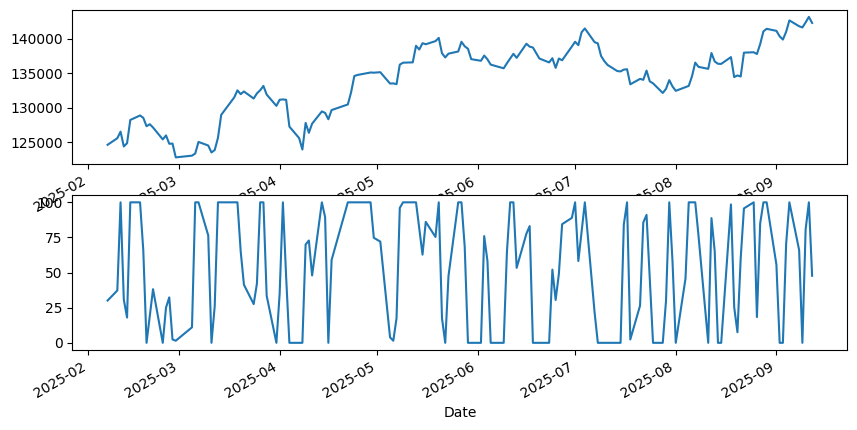

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10,5));

ibov['Close'].iloc[-150:].plot(ax=ax[0]);
ibov['rsi'].iloc[-150:].plot(ax=ax[1]);

Cálculo rudimentar do PnL:

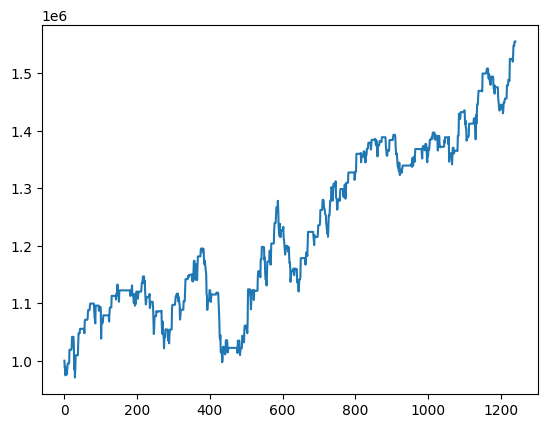

In [33]:
# Protótipo da estratégia:
k = 1_000_000
position = 0
PV = [] # Patrimonio líquido

for row in ibov.itertuples():
    if row.rsi < 10 and position == 0:
        position = k // row.Close
        k -= position * row.Close
    elif row.rsi > 80 and position != 0:
        k += position * row.Close
        position = 0
    
    PV.append(k + position * row.Close)

pd.Series(PV).plot();

In [34]:
print(f"PnL acumulado: {PV[-1] - 1_000_000}")

PnL acumulado: 555447.0


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

class BacktestingEngine:
    def __init__(self, initial_capital=1_000_000, cdi_rate=0.10):
        self.initial_capital = initial_capital
        self.cdi_rate = cdi_rate  # 10% ao ano
        self.daily_cdi_rate = (1 + cdi_rate) ** (1/252) - 1  # Taxa diária
        
        # Variáveis de estado
        self.cash = initial_capital
        self.position = 0
        self.entry_price = 0
        
        # Histórico para análise
        self.portfolio_value = []
        self.trades = []
        self.cash_history = []
        self.position_history = []
        
    def execute_strategy(self, data):
        """Executa a estratégia RSI"""
        
        for idx, row in data.iterrows():
            current_price = row['Close']
            rsi_value = row['rsi']
            
            # Aplicar carrego no dinheiro em caixa
            if self.cash > 0:
                self.cash *= (1 + self.daily_cdi_rate)
            
            # Lógica de entrada (RSI <= 10 e sem posição)
            if rsi_value <= 10 and self.position == 0:
                quantity = int(self.cash // current_price)
                if quantity > 0:
                    cost = quantity * current_price
                    self.cash -= cost
                    self.position = quantity
                    self.entry_price = current_price
                    
                    # Registrar trade de entrada
                    self.trades.append({
                        'date': idx,
                        'type': 'BUY',
                        'price': current_price,
                        'quantity': quantity,
                        'rsi': rsi_value
                    })
            
            # Lógica de saída (RSI >= 80 e com posição)
            elif rsi_value >= 80 and self.position > 0:
                proceeds = self.position * current_price
                self.cash += proceeds
                
                # Calcular resultado do trade
                trade_result = (current_price - self.entry_price) * self.position
                
                # Registrar trade de saída
                self.trades.append({
                    'date': idx,
                    'type': 'SELL',
                    'price': current_price,
                    'quantity': self.position,
                    'rsi': rsi_value,
                    'trade_result': trade_result
                })
                
                self.position = 0
                self.entry_price = 0
            
            # Calcular valor do portfolio (Mark to Market)
            portfolio_value = self.cash + (self.position * current_price)
            self.portfolio_value.append(portfolio_value)
            self.cash_history.append(self.cash)
            self.position_history.append(self.position)
        
        return self.calculate_metrics()
    
    def calculate_metrics(self):
        """Calcula todas as métricas solicitadas"""
        pv_series = pd.Series(self.portfolio_value)
        returns = pv_series.pct_change().dropna()
        
        # === PROFITABILITY METRICS ===
        total_return = (self.portfolio_value[-1] - self.initial_capital) / self.initial_capital
        average_daily_return = returns.mean()
        
        # Win Rate (taxa de acerto dos trades)
        profitable_trades = [t for t in self.trades if t.get('trade_result', 0) > 0]
        total_completed_trades = len([t for t in self.trades if t['type'] == 'SELL'])
        win_rate = len(profitable_trades) / total_completed_trades if total_completed_trades > 0 else 0
        
        # === RISK METRICS ===
        # Maximum Drawdown
        peak = pv_series.expanding().max()
        drawdown = (pv_series - peak) / peak
        max_drawdown = drawdown.min()
        
        # Volatility (anualizada)
        volatility = returns.std() * np.sqrt(252)
        
        # Sharpe Ratio (assumindo risk-free rate = CDI)
        excess_returns = returns - self.daily_cdi_rate
        sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252) if excess_returns.std() > 0 else 0
        
        # === PERFORMANCE METRICS ===
        # Sortino Ratio (usando apenas downside deviation)
        negative_returns = returns[returns < self.daily_cdi_rate]
        downside_deviation = negative_returns.std() * np.sqrt(252)
        sortino_ratio = (average_daily_return * 252 - self.cdi_rate) / downside_deviation if downside_deviation > 0 else 0
        
        # Calmar Ratio (retorno anualizado / max drawdown)
        annualized_return = (1 + total_return) ** (252 / len(pv_series)) - 1
        calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else 0
        
        return {
            # Profitability
            'Total Return (%)': total_return * 100,
            'Average Daily Return (%)': average_daily_return * 100,
            'Annualized Return (%)': annualized_return * 100,
            'Win Rate (%)': win_rate * 100,
            'Total Trades': total_completed_trades,
            
            # Risk
            'Maximum Drawdown (%)': max_drawdown * 100,
            'Volatility (%)': volatility * 100,
            'Sharpe Ratio': sharpe_ratio,
            
            # Performance  
            'Sortino Ratio': sortino_ratio,
            'Calmar Ratio': calmar_ratio,
            
            # Valores absolutos
            'Initial Capital': self.initial_capital,
            'Final Value': self.portfolio_value[-1],
            'Profit/Loss': self.portfolio_value[-1] - self.initial_capital
        }

# Executar o backtesting
engine = BacktestingEngine(initial_capital=1_000_000, cdi_rate=0.10)
metrics = engine.execute_strategy(ibov)

print("=== RESULTADOS DO BACKTESTING - ESTRATÉGIA RSI(2) ===")
print("--- PROFITABILITY METRICS ---")
print(f"Total Return: {metrics['Total Return (%)']:.2f}%")
print(f"Annualized Return: {metrics['Annualized Return (%)']:.2f}%")
print(f"Average Daily Return: {metrics['Average Daily Return (%)']:.4f}%")
print(f"Win Rate: {metrics['Win Rate (%)']:.2f}%")
print(f"Total Trades: {metrics['Total Trades']}")

print("--- RISK METRICS ---")
print(f"Maximum Drawdown: {metrics['Maximum Drawdown (%)']:.2f}%")
print(f"Volatility (annualized): {metrics['Volatility (%)']:.2f}%")
print(f"Sharpe Ratio: {metrics['Sharpe Ratio']:.3f}")

print("--- PERFORMANCE METRICS ---")
print(f"Sortino Ratio: {metrics['Sortino Ratio']:.3f}")
print(f"Calmar Ratio: {metrics['Calmar Ratio']:.3f}")

print("--- ABSOLUTE VALUES ---")
print(f"Initial Capital: R$ {metrics['Initial Capital']:,.2f}")
print(f"Final Value: R$ {metrics['Final Value']:,.2f}")
print(f"Profit/Loss: R$ {metrics['Profit/Loss']:,.2f}")

=== RESULTADOS DO BACKTESTING - ESTRATÉGIA RSI(2) ===
--- PROFITABILITY METRICS ---
Total Return: 103.81%
Annualized Return: 15.56%
Average Daily Return: 0.0602%
Win Rate: 69.63%
Total Trades: 135
--- RISK METRICS ---
Maximum Drawdown: -15.21%
Volatility (annualized): 11.82%
Sharpe Ratio: 0.476
--- PERFORMANCE METRICS ---
Sortino Ratio: 0.459
Calmar Ratio: 1.023
--- ABSOLUTE VALUES ---
Initial Capital: R$ 1,000,000.00
Final Value: R$ 2,038,130.33
Profit/Loss: R$ 1,038,130.33


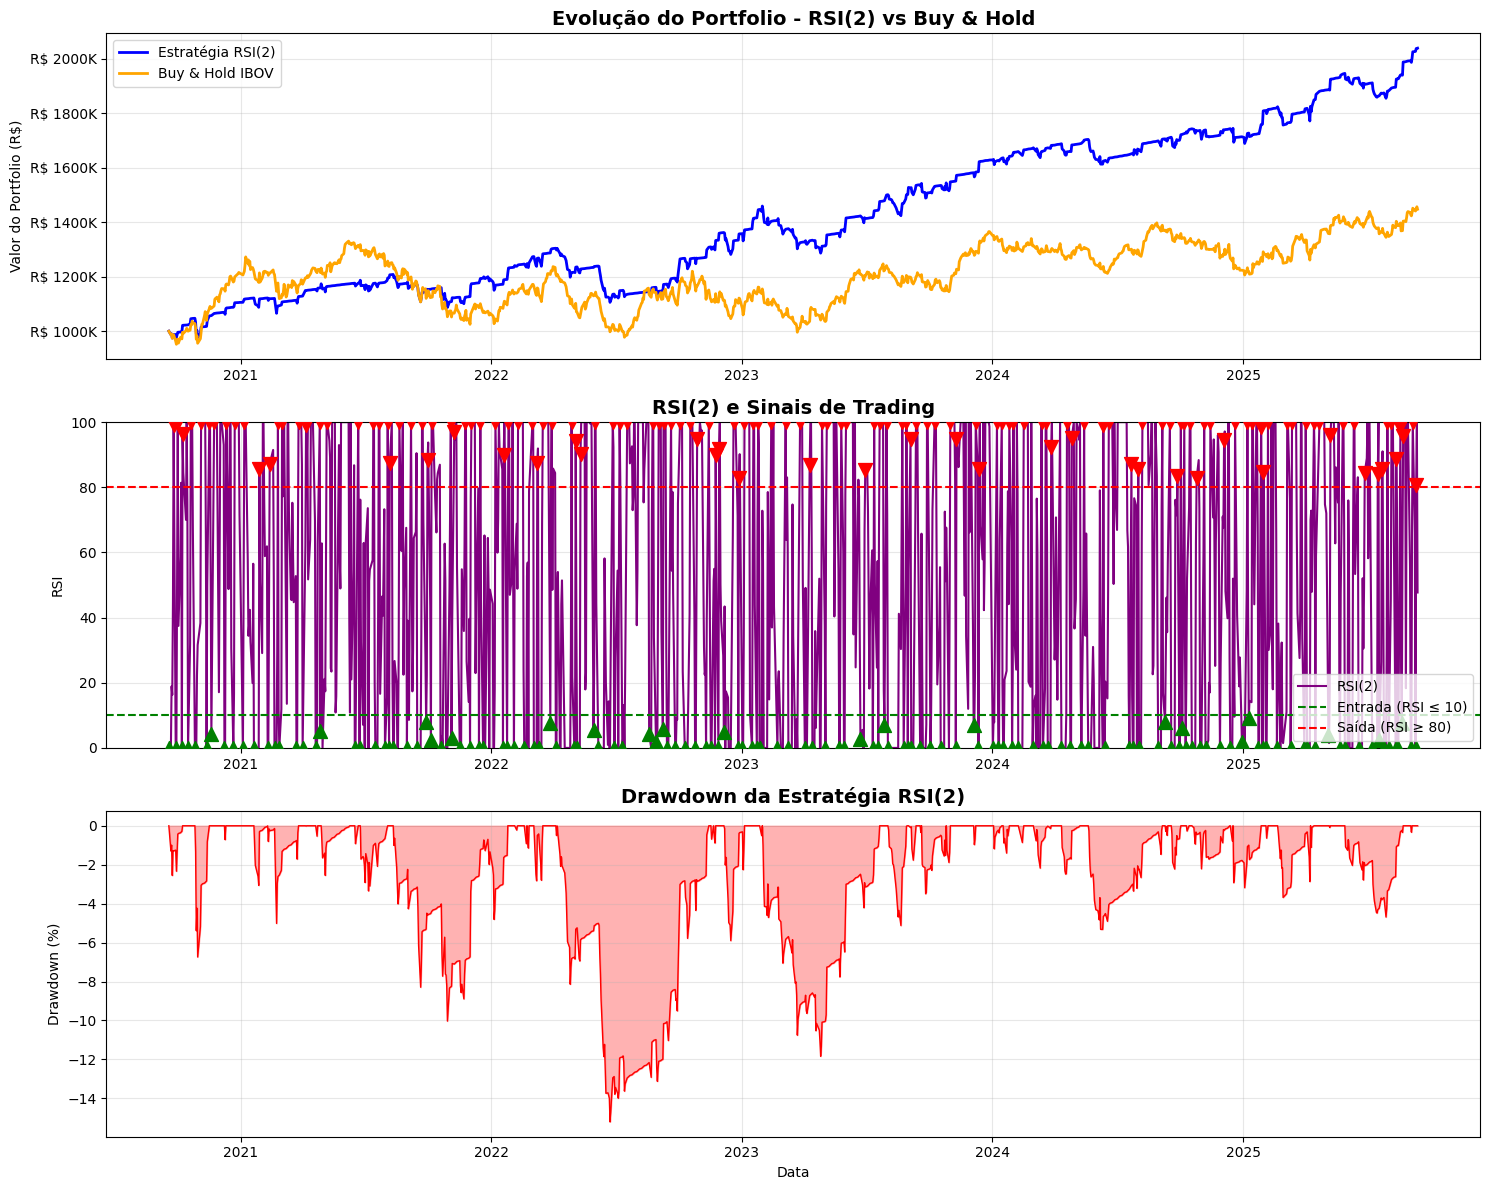

=== SUMÁRIO DOS TRADES ===
Total de trades de entrada: 135
Total de trades de saída: 135
Melhor trade: R$ 70,200.00
Pior trade: R$ -103,642.00
Trade médio: R$ 4,867.61


In [40]:
# === GRÁFICOS DA SIMULAÇÃO ===

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Gráfico 1: Evolução do Portfolio vs Buy & Hold
portfolio_series = pd.Series(engine.portfolio_value, index=ibov.index)
buy_hold = ibov['Close'] / ibov['Close'].iloc[0] * 1_000_000

axes[0].plot(portfolio_series.index, portfolio_series, label='Estratégia RSI(2)', color='blue', linewidth=2)
axes[0].plot(buy_hold.index, buy_hold, label='Buy & Hold IBOV', color='orange', linewidth=2)
axes[0].set_title('Evolução do Portfolio - RSI(2) vs Buy & Hold', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor do Portfolio (R$)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

# Gráfico 2: RSI e sinais de entrada/saída
axes[1].plot(ibov.index, ibov['rsi'], label='RSI(2)', color='purple')
axes[1].axhline(y=10, color='green', linestyle='--', label='Entrada (RSI ≤ 10)')
axes[1].axhline(y=80, color='red', linestyle='--', label='Saída (RSI ≥ 80)')

# Marcar os trades no gráfico
buy_trades = [t for t in engine.trades if t['type'] == 'BUY']
sell_trades = [t for t in engine.trades if t['type'] == 'SELL']

for trade in buy_trades:
    axes[1].scatter(trade['date'], trade['rsi'], color='green', marker='^', s=100, zorder=5)

for trade in sell_trades:
    axes[1].scatter(trade['date'], trade['rsi'], color='red', marker='v', s=100, zorder=5)

axes[1].set_title('RSI(2) e Sinais de Trading', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 100)

# Gráfico 3: Drawdown
peak = portfolio_series.expanding().max()
drawdown = (portfolio_series - peak) / peak * 100
axes[2].fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
axes[2].plot(drawdown.index, drawdown, color='red', linewidth=1)
axes[2].set_title('Drawdown da Estratégia RSI(2)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Drawdown (%)')
axes[2].set_xlabel('Data')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sumário dos trades
print("=== SUMÁRIO DOS TRADES ===")
print(f"Total de trades de entrada: {len(buy_trades)}")
print(f"Total de trades de saída: {len(sell_trades)}")

if sell_trades:
    trade_results = [t['trade_result'] for t in sell_trades]
    print(f"Melhor trade: R$ {max(trade_results):,.2f}")
    print(f"Pior trade: R$ {min(trade_results):,.2f}")
    print(f"Trade médio: R$ {np.mean(trade_results):,.2f}")

In [42]:
# === ANÁLISE COMPARATIVA E CONCLUSÕES ===

# Calculando métricas do Buy & Hold para comparação
buy_hold_final = buy_hold.iloc[-1]
buy_hold_return = (buy_hold_final - 1_000_000) / 1_000_000 * 100
buy_hold_returns = buy_hold.pct_change().dropna()
buy_hold_volatility = buy_hold_returns.std() * np.sqrt(252) * 100

# Buy & Hold Drawdown
bh_peak = buy_hold.expanding().max()
bh_drawdown = (buy_hold - bh_peak) / bh_peak
bh_max_drawdown = bh_drawdown.min() * 100

# Buy & Hold Sharpe Ratio
bh_excess_returns = buy_hold_returns - engine.daily_cdi_rate
bh_sharpe = bh_excess_returns.mean() / bh_excess_returns.std() * np.sqrt(252) if bh_excess_returns.std() > 0 else 0

print("=== COMPARAÇÃO: ESTRATÉGIA RSI(2) vs BUY & HOLD ===")
print("{:<25} | {:<15} | {:<15}".format("MÉTRICA", "RSI(2)", "BUY & HOLD"))
print("-" * 60)
print("{:<25} | {:<15.2f} | {:<15.2f}".format("Total Return (%)", metrics['Total Return (%)'], buy_hold_return))
print("{:<25} | {:<15.2f} | {:<15.2f}".format("Annualized Return (%)", metrics['Annualized Return (%)'], (1 + buy_hold_return/100)**(252/len(ibov)) - 1)*100)
print("{:<25} | {:<15.2f} | {:<15.2f}".format("Volatility (%)", metrics['Volatility (%)'], buy_hold_volatility))
print("{:<25} | {:<15.2f} | {:<15.2f}".format("Max Drawdown (%)", metrics['Maximum Drawdown (%)'], bh_max_drawdown))
print("{:<25} | {:<15.3f} | {:<15.3f}".format("Sharpe Ratio", metrics['Sharpe Ratio'], bh_sharpe))
print("{:<25} | {:<15.3f} | {:<15}".format("Sortino Ratio", metrics['Sortino Ratio'], "/A"))
print("{:<25} | {:<15.3f} | {:<15}".format("Calmar Ratio", metrics['Calmar Ratio'], "/A"))
print("{:<25} | {:<15} | {:<15}".format("Total Trades", metrics['Total Trades'], "1"))

print("=== CONCLUSÕES ===")
print("1. RETORNO:")
if metrics['Total Return (%)'] > buy_hold_return:
    print(f"   ✓ A estratégia RSI(2) superou o Buy & Hold em {metrics['Total Return (%)'] - buy_hold_return:.2f} pontos percentuais")
else:
    print(f"   ✗ A estratégia RSI(2) ficou {buy_hold_return - metrics['Total Return (%)']:.2f} pontos percentuais atrás do Buy & Hold")

print("2. RISCO:")
if abs(metrics['Maximum Drawdown (%)']) < abs(bh_max_drawdown):
    print(f"   ✓ A estratégia RSI(2) teve menor drawdown máximo ({metrics['Maximum Drawdown (%)']:.2f}% vs {bh_max_drawdown:.2f}%)")
else:
    print(f"   ✗ A estratégia RSI(2) teve maior drawdown máximo ({metrics['Maximum Drawdown (%)']:.2f}% vs {bh_max_drawdown:.2f}%)")

if metrics['Volatility (%)'] < buy_hold_volatility:
    print(f"   ✓ A estratégia RSI(2) teve menor volatilidade ({metrics['Volatility (%)']:.2f}% vs {buy_hold_volatility:.2f}%)")
else:
    print(f"   ✗ A estratégia RSI(2) teve maior volatilidade ({metrics['Volatility (%)']:.2f}% vs {buy_hold_volatility:.2f}%)")

print("3. EFICIÊNCIA (Risk-Adjusted Returns):")
if metrics['Sharpe Ratio'] > bh_sharpe:
    print(f"   ✓ A estratégia RSI(2) teve melhor Sharpe Ratio ({metrics['Sharpe Ratio']:.3f} vs {bh_sharpe:.3f})")
else:
    print(f"   ✗ A estratégia RSI(2) teve pior Sharpe Ratio ({metrics['Sharpe Ratio']:.3f} vs {bh_sharpe:.3f})")

print("4. CARREGO:")
cdi_accumulated = (1 + engine.cdi_rate) ** (len(ibov) / 252) - 1
print(f"   ✓ O carrego de CDI (10% a.a.) foi aplicado, resultando em {cdi_accumulated*100:.2f}% no período")

print("5. OBSERVAÇÕES IMPORTANTES:")
print("   • A estratégia não considera custos de transação (corretagem, impostos)")
print("   • Os sinais são baseados no preço de fechamento do mesmo dia")
print("   • Na prática, haveria slippage entre o sinal e a execução")
print("   • O período analisado pode não ser representativo para outras condições de mercado")

=== COMPARAÇÃO: ESTRATÉGIA RSI(2) vs BUY & HOLD ===
MÉTRICA                   | RSI(2)          | BUY & HOLD     
------------------------------------------------------------
Total Return (%)          | 103.81          | 44.75          
Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.56           | 0.08           Annualized Return (%)     | 15.

Vocês acham?

Podemos melhorar esse número?

Só o PnL é suficiente para avaliar a estratégia?

Mais importante: está certo isso? (dica: falta carrego e custos)

___